In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from scipy import stats
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
import pandas_profiling
from sklearn.utils import resample

%matplotlib inline

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test_sample.csv')

age — borrower's age

monthly_income — borrower's monthly income

credit_card_utilization — the ratio of the account balance to the credit limit

debt_to_income — debt to income ratio

credits_loans — current number of loans and credit lines

mortgage_loans — current number of mortgage loans

family_members — number of members in the borrower's family

overdue_30_59_days — number of previous delinquencies from 30 to 59 days

overdue_60_89_days — Number of previous delinquencies from 60 to 89 days

overdue__more_than_90_days — the number of previous delinquencies of more than 90 days

target — whether the loan was overdue for more than 90 days - only available in the training sample The y_train file contains answers whether or not the loan was overdue (0 or 1) in fact

In [3]:
X_train.head(5)

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [4]:
X_test = X_test.iloc[:, 1:]
X_test

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...
38871,0.731740,39,0,0.251005,3474.894386,5,0,0,0,0.0
38872,0.010959,70,0,0.152539,4170.426464,14,0,1,0,0.0
38873,0.084612,52,0,5288.053772,NaN,15,0,2,0,0.0
38874,0.741717,51,0,0.378356,5441.458787,9,0,2,0,0.0


credit_card_utilization - 0%
age - 0%
overdue_30_59_days - 0%
debt_to_income - 0%
monthly_income - 20%
credits_loans - 0%
overdue__more_than_90_days - 0%
mortgage_loans - 0%
overdue_60_89_days - 0%
family_members - 3%


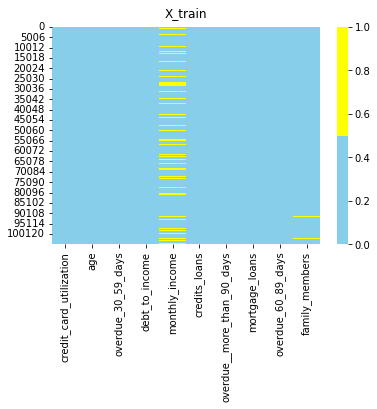

In [5]:
# Visualizing gaps in the training dataset:

for col in X_train.columns:
    pct_missing = np.mean(X_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# Choosing all columns:
cols = X_train.columns[:10]

# Defining colours: yellow - missing data, blue - not missing data:  
colours = ['#87CEEB', '#FFFF00'] 
sns.heatmap(X_train[cols].isnull(), cmap=sns.color_palette(colours))
plt.title("X_train", pad=10)
plt.show()

credit_card_utilization - 0%
age - 0%
overdue_30_59_days - 0%
debt_to_income - 0%
monthly_income - 19%
credits_loans - 0%
overdue__more_than_90_days - 0%
mortgage_loans - 0%
overdue_60_89_days - 0%
family_members - 2%


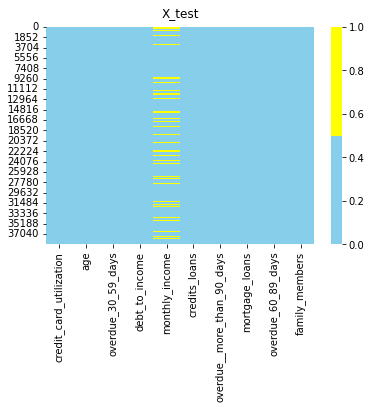

In [6]:
# Visualizing gaps in the test dataset:
for col in X_test.columns:
    pct_missing = np.mean(X_test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# Choosing all columns:
cols = X_test.columns[:10]

# Defining colours: yellow - missing data, blue - not missing data:  
colours = ['#87CEEB', '#FFFF00'] 
sns.heatmap(X_test[cols].isnull(), cmap=sns.color_palette(colours))
plt.title("X_test", pad=10)
plt.show()

In [7]:
# Making datasets look generic to make them easier to work with:

X_train = X_train[['age', 'monthly_income', 'credit_card_utilization', 'debt_to_income', 'credits_loans', 'mortgage_loans',\
                  'family_members', 'overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days']]
X_test = X_test[['age', 'monthly_income', 'credit_card_utilization', 'debt_to_income', 'credits_loans', 'mortgage_loans',\
                  'family_members', 'overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days']]

# Filling in the gaps in the dataset columns with mods of those columns:

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit(X_train)
im_X_train = imputer.transform(X_train)
X_train = pd.DataFrame(im_X_train, columns=[['age', 'monthly_income', 'credit_card_utilization', 'debt_to_income', 'credits_loans', 'mortgage_loans',\
                  'family_members', 'overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days']])

imputer.fit(X_test)
im_X_test = imputer.transform(X_test)
X_test = pd.DataFrame(im_X_test, columns=[['age', 'monthly_income', 'credit_card_utilization', 'debt_to_income', 'credits_loans', 'mortgage_loans',\
                  'family_members', 'overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days']])

X_train

,age,monthly_income,credit_card_utilization,debt_to_income,credits_loans,mortgage_loans,family_members,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days
0,56.0,6823.894458,0.000000,0.504328,9.0,1.0,5.0,0.0,0.0,0.0
1,45.0,356.580765,0.170659,2.405860,5.0,0.0,0.0,1.0,0.0,0.0
2,75.0,20349.895825,0.342176,0.445066,9.0,3.0,0.0,1.0,0.0,0.0
3,50.0,2894.368968,0.046219,0.814508,12.0,1.0,3.0,0.0,0.0,0.0
4,58.0,24833.227614,0.679556,0.390311,15.0,4.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
105104,62.0,9928.125255,0.017608,0.184589,6.0,2.0,0.0,0.0,0.0,0.0
105105,25.0,2187.355843,0.980631,0.158753,3.0,0.0,0.0,0.0,0.0,0.0
105106,73.0,3961.841113,0.050256,0.849711,12.0,2.0,0.0,1.0,0.0,0.0
105107,43.0,3705.546719,0.447882,0.068033,4.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X_train.columns=['age', 'monthly_income', 'credit_card_utilization', 'debt_to_income', 'credits_loans', 'mortgage_loans',\
                  'family_members', 'overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days']

X_test.columns=['age', 'monthly_income', 'credit_card_utilization', 'debt_to_income', 'credits_loans', 'mortgage_loans',\
                  'family_members', 'overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days']
X_train

,age,monthly_income,credit_card_utilization,debt_to_income,credits_loans,mortgage_loans,family_members,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days
0,56.0,6823.894458,0.000000,0.504328,9.0,1.0,5.0,0.0,0.0,0.0
1,45.0,356.580765,0.170659,2.405860,5.0,0.0,0.0,1.0,0.0,0.0
2,75.0,20349.895825,0.342176,0.445066,9.0,3.0,0.0,1.0,0.0,0.0
3,50.0,2894.368968,0.046219,0.814508,12.0,1.0,3.0,0.0,0.0,0.0
4,58.0,24833.227614,0.679556,0.390311,15.0,4.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
105104,62.0,9928.125255,0.017608,0.184589,6.0,2.0,0.0,0.0,0.0,0.0
105105,25.0,2187.355843,0.980631,0.158753,3.0,0.0,0.0,0.0,0.0,0.0
105106,73.0,3961.841113,0.050256,0.849711,12.0,2.0,0.0,1.0,0.0,0.0
105107,43.0,3705.546719,0.447882,0.068033,4.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Getting rid of the outliers: remove the lines with values that deviate by more than 3 sigmas:

X_train = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
X_train = X_train.merge(y_train, left_index=True, right_index=True, how="inner")
X_train = X_train.drop_duplicates()
X_train.reset_index(inplace=False)
X_train

,age,monthly_income,credit_card_utilization,debt_to_income,credits_loans,mortgage_loans,family_members,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,target
1,45.0,356.580765,0.170659,2.405860,5.0,0.0,0.0,1.0,0.0,0.0,0
2,75.0,20349.895825,0.342176,0.445066,9.0,3.0,0.0,1.0,0.0,0.0,0
3,50.0,2894.368968,0.046219,0.814508,12.0,1.0,3.0,0.0,0.0,0.0,0
4,58.0,24833.227614,0.679556,0.390311,15.0,4.0,2.0,0.0,0.0,0.0,0
5,32.0,3898.183106,0.874546,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
105104,62.0,9928.125255,0.017608,0.184589,6.0,2.0,0.0,0.0,0.0,0.0,0
105105,25.0,2187.355843,0.980631,0.158753,3.0,0.0,0.0,0.0,0.0,0.0,0
105106,73.0,3961.841113,0.050256,0.849711,12.0,2.0,0.0,1.0,0.0,0.0,0
105107,43.0,3705.546719,0.447882,0.068033,4.0,0.0,0.0,0.0,1.0,0.0,0


In [10]:
# Replacing the values in the age and monthly_income columns with the age and salary categories of the clients:

X_train.loc[(X_train["monthly_income"] >= 0) & (X_train["monthly_income"] < 5000), "monthly_income"] = 1
X_train.loc[(X_train["monthly_income"] >= 5000) & (X_train["monthly_income"] < 10000), "monthly_income"] = 2
X_train.loc[(X_train["monthly_income"] >= 10000) & (X_train["monthly_income"] < 15000), "monthly_income"] = 3
X_train.loc[(X_train["monthly_income"] >= 15000) & (X_train["monthly_income"] < 20000), "monthly_income"] = 4
X_train.loc[(X_train["monthly_income"] >= 20000) & (X_train["monthly_income"] < 25000), "monthly_income"] = 5
X_train.loc[(X_train["monthly_income"] >= 25000) & (X_train["monthly_income"] < 30000), "monthly_income"] = 6
X_train.loc[(X_train["monthly_income"] >= 30000) & (X_train["monthly_income"] < 35000), "monthly_income"] = 7
X_train.loc[X_train["monthly_income"] >= 35000, "monthly_income"] = 8
X_train["monthly_income"] = X_train["monthly_income"].astype(int)
X_train

X_train.loc[(X_train["age"] >= 0) & (X_train["age"] < 18), "age"] = 1
X_train.loc[(X_train["age"] >= 18) & (X_train["age"] < 25), "age"] = 2
X_train.loc[(X_train["age"] >= 25) & (X_train["age"] < 30), "age"] = 3
X_train.loc[(X_train["age"] >= 30) & (X_train["age"] < 45), "age"] = 4
X_train.loc[(X_train["age"] >= 45) & (X_train["age"] < 60), "age"] = 5
X_train.loc[X_train["age"] >= 60, "age"] = 6
X_train["age"] = X_train["age"].astype(int)
X_train

X_test.loc[(X_test["monthly_income"] >= 0) & (X_test["monthly_income"] < 5000), "monthly_income"] = 1
X_test.loc[(X_test["monthly_income"] >= 5000) & (X_test["monthly_income"] < 10000), "monthly_income"] = 2
X_test.loc[(X_test["monthly_income"] >= 10000) & (X_test["monthly_income"] < 15000), "monthly_income"] = 3
X_test.loc[(X_test["monthly_income"] >= 15000) & (X_test["monthly_income"] < 20000), "monthly_income"] = 4
X_test.loc[(X_test["monthly_income"] >= 20000) & (X_test["monthly_income"] < 25000), "monthly_income"] = 5
X_test.loc[(X_test["monthly_income"] >= 25000) & (X_test["monthly_income"] < 30000), "monthly_income"] = 6
X_test.loc[(X_test["monthly_income"] >= 30000) & (X_test["monthly_income"] < 35000), "monthly_income"] = 7
X_test.loc[X_test["monthly_income"] >= 35000, "monthly_income"] = 8
X_test["monthly_income"] = X_test["monthly_income"].astype(int)
X_test

X_test.loc[(X_test["age"] >= 0) & (X_test["age"] < 18), "age"] = 1
X_test.loc[(X_test["age"] >= 18) & (X_test["age"] < 25), "age"] = 2
X_test.loc[(X_test["age"] >= 25) & (X_test["age"] < 30), "age"] = 3
X_test.loc[(X_test["age"] >= 30) & (X_test["age"] < 45), "age"] = 4
X_test.loc[(X_test["age"] >= 45) & (X_test["age"] < 60), "age"] = 5
X_test.loc[X_test["age"] >= 60, "age"] = 6
X_test["age"] = X_test["age"].astype(int)
X_test

,age,monthly_income,credit_card_utilization,debt_to_income,credits_loans,mortgage_loans,family_members,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days
0,6,3,0.021069,0.184907,9.0,1.0,0.0,0.0,0.0,0.0
1,6,2,0.009985,0.446264,6.0,3.0,0.0,0.0,0.0,0.0
2,4,1,0.535187,0.406317,14.0,2.0,3.0,1.0,0.0,0.0
3,4,1,0.051264,0.311893,8.0,0.0,1.0,0.0,0.0,0.0
4,5,2,0.069525,0.294956,6.0,1.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
38871,4,1,0.731740,0.251005,5.0,0.0,0.0,0.0,0.0,0.0
38872,6,1,0.010959,0.152539,14.0,1.0,0.0,0.0,0.0,0.0
38873,5,1,0.084612,5288.053772,15.0,2.0,0.0,0.0,0.0,0.0
38874,5,2,0.741717,0.378356,9.0,2.0,0.0,0.0,0.0,0.0


In [11]:
X_train

,age,monthly_income,credit_card_utilization,debt_to_income,credits_loans,mortgage_loans,family_members,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,target
1,5,1,0.170659,2.405860,5.0,0.0,0.0,1.0,0.0,0.0,0
2,6,5,0.342176,0.445066,9.0,3.0,0.0,1.0,0.0,0.0,0
3,5,1,0.046219,0.814508,12.0,1.0,3.0,0.0,0.0,0.0,0
4,5,5,0.679556,0.390311,15.0,4.0,2.0,0.0,0.0,0.0,0
5,4,1,0.874546,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
105104,6,2,0.017608,0.184589,6.0,2.0,0.0,0.0,0.0,0.0,0
105105,3,1,0.980631,0.158753,3.0,0.0,0.0,0.0,0.0,0.0,0
105106,6,1,0.050256,0.849711,12.0,2.0,0.0,1.0,0.0,0.0,0
105107,4,1,0.447882,0.068033,4.0,0.0,0.0,0.0,1.0,0.0,0


In [12]:
# Counting the number of classes:

X_train['target'].value_counts()

0    94255
1     6571
Name: target, dtype: int64

In [13]:
X_train

,age,monthly_income,credit_card_utilization,debt_to_income,credits_loans,mortgage_loans,family_members,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,target
1,5,1,0.170659,2.405860,5.0,0.0,0.0,1.0,0.0,0.0,0
2,6,5,0.342176,0.445066,9.0,3.0,0.0,1.0,0.0,0.0,0
3,5,1,0.046219,0.814508,12.0,1.0,3.0,0.0,0.0,0.0,0
4,5,5,0.679556,0.390311,15.0,4.0,2.0,0.0,0.0,0.0,0
5,4,1,0.874546,0.000000,0.0,0.0,3.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
105104,6,2,0.017608,0.184589,6.0,2.0,0.0,0.0,0.0,0.0,0
105105,3,1,0.980631,0.158753,3.0,0.0,0.0,0.0,0.0,0.0,0
105106,6,1,0.050256,0.849711,12.0,2.0,0.0,1.0,0.0,0.0,0
105107,4,1,0.447882,0.068033,4.0,0.0,0.0,0.0,1.0,0.0,0


In [14]:
# Separating the zeros and ones:

df_majority = X_train[X_train.target==0]
df_minority = X_train[X_train.target==1]

# Complementing a class that is outnumbered:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=94255,    # To match majority class
                                 random_state=123) # Reproducible results

# Putting the classes back together:

X_train = pd.concat([df_majority, df_minority_upsampled])
X_train["target"].value_counts()

0    94255
1    94255
Name: target, dtype: int64

In [15]:
# Creating a training sample and a test sample from the training dataset to evaluate the quality of our models:

tr_X_train, tr_X_test, tr_y_train, tr_y_test = train_test_split(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values, train_size=0.75)

In [16]:
# A function for visualizing the effect of the hyperparameters of our models on their quality estimates:

def visualization(acc_list, pr_list, recall_list, f1_list, roc_list, s, c):
    fig = plt.figure(figsize=(20, 8))

    ax1 = fig.add_subplot(321)
    ax1.plot(acc_list, s)
    ax1.set_title("Accuracy")
    ax1.set_xlabel("Accuracy score", labelpad=12.5)
    ax1.set_ylabel("{}".format(c), labelpad=12.5)

    ax2 = fig.add_subplot(323)
    ax2.plot(pr_list, s)
    ax2.set_title("Precision")
    ax2.set_xlabel("Precision score", labelpad=12.5)
    ax2.set_ylabel("{}".format(c), labelpad=12.5)
    
    ax3 = fig.add_subplot(325)
    ax3.plot(recall_list, s)
    ax3.set_title("Recall")
    ax3.set_xlabel("Recall score", labelpad=12.5)
    ax3.set_ylabel("{}".format(c), labelpad=12.5)
    
    ax4 = fig.add_subplot(222)
    ax4.plot(f1_list, s)
    ax4.set_title("F1 score")
    ax4.set_xlabel("F1 score", labelpad=12.5)
    ax4.set_ylabel("{}".format(c), labelpad=12.5)

    ax5 = fig.add_subplot(224)
    ax5.plot(roc_list, s)
    ax5.set_title("ROC-AUC")
    ax5.set_xlabel("ROC-AUC score", labelpad=12.5)
    ax5.set_ylabel("{}".format(c), labelpad=12.5)

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.8)
    plt.show()

In [17]:
# Creating a dataframe to store the best metrics of all models:

metrics = pd.DataFrame(index=["Log_reg", "kNN", "Tree", "RF", "GB"], columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])

# Logistic Regression

In [18]:
# Let's set the hyperparameters of our model to be used in GridSearch, and then train our model, using the best parameters:


parameters = {"penalty": ["l1", "l2"], "C": [0.5, 0.7, 0.9, 1.0], "random_state": [42], "solver": ["liblinear"], "max_iter": [50, 100, 150, 200]}
log_reg = LogisticRegression()
log_reg_clf = GridSearchCV(log_reg, parameters, n_jobs=-1, verbose=3)
log_reg_clf.fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.7, 0.9, 1.0],
                         'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'solver': ['liblinear']},
             verbose=3)

Let's see how the model quality assessment metrics differ for different values of the model regularization power coefficient 'C' : 

C = 0.5 :
accuracy: 0.749002716007469
precision: 0.8284886958458626
recall: 0.6297033055402718
f1_score: 0.7454818417955775
roc_auc: 0.7493225263499836 

C = 0.7 :
accuracy: 0.7489814971991173
precision: 0.8284425636171279
recall: 0.6297033055402718
f1_score: 0.7454616135319087
roc_auc: 0.7493012506595874 

C = 0.9 :
accuracy: 0.7489814971991173
precision: 0.8284425636171279
recall: 0.6297033055402718
f1_score: 0.7454616135319087
roc_auc: 0.7493012506595874 

C = 1.0 :
accuracy: 0.7489814971991173
precision: 0.8284425636171279
recall: 0.6297033055402718
f1_score: 0.7454616135319087
roc_auc: 0.7493012506595874 

Visualizing the result:


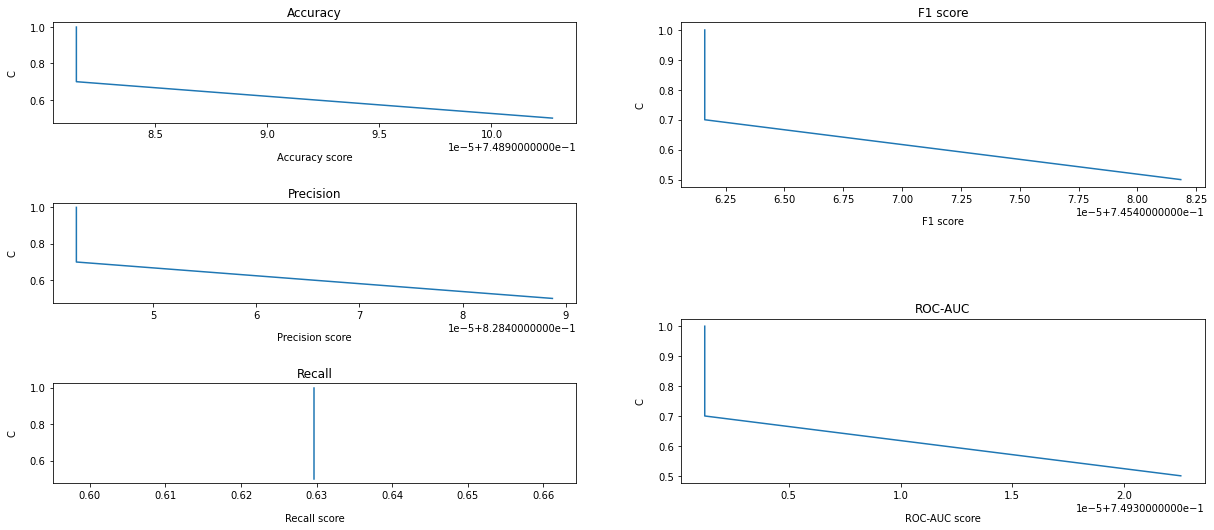

In [19]:
print("Let's see how the model quality assessment metrics differ for different values of the model regularization power coefficient \'C\' : \n")

s = [0.5, 0.7, 0.9, 1.0]
c = "C"


log_reg_acc_list = []
log_reg_pr_list = []
log_reg_recall_list = []
log_reg_f1_list = []
log_reg_roc_list = []
for i in range(4):
    log_reg_check = LogisticRegression(C=s[i], max_iter=50, penalty="l1", random_state=42, solver="liblinear").fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values).predict(tr_X_test)
    log_reg_acc_list.append(accuracy_score(tr_y_test, log_reg_check))
    log_reg_pr_list.append(precision_score(tr_y_test, log_reg_check))
    log_reg_recall_list.append(recall_score(tr_y_test, log_reg_check))
    log_reg_f1_list.append(f1_score(tr_y_test, log_reg_check, average='macro'))
    log_reg_roc_list.append(roc_auc_score(tr_y_test, log_reg_check))
    print("C =", s[i], ":")
    print("accuracy:", accuracy_score(tr_y_test, log_reg_check))
    print("precision:", precision_score(tr_y_test, log_reg_check))
    print("recall:", recall_score(tr_y_test, log_reg_check))
    print("f1_score:", f1_score(tr_y_test, log_reg_check, average='macro'))
    print("roc_auc:", roc_auc_score(tr_y_test, log_reg_check), '\n')
    
print("Visualizing the result:")

visualization(log_reg_acc_list, log_reg_pr_list, log_reg_recall_list, log_reg_f1_list, log_reg_roc_list, s, c)

In [20]:
# Choosing the best ROC-AUC metric and add the values of the other metrics to the dataframe:

max_roc = max(log_reg_roc_list)
max_ind = log_reg_roc_list.index(max_roc)
metrics.loc["Log_reg", "Accuracy"] = log_reg_acc_list[max_ind]
metrics.loc["Log_reg", "Precision"] = log_reg_pr_list[max_ind]
metrics.loc["Log_reg", "Recall"] = log_reg_recall_list[max_ind]
metrics.loc["Log_reg", "F1"] = log_reg_f1_list[max_ind]
metrics.loc["Log_reg", "ROC-AUC"] = max_roc
metrics

,Accuracy,Precision,Recall,F1,ROC-AUC
Log_reg,0.749003,0.828489,0.629703,0.745482,0.749323
kNN,NaN,NaN,NaN,NaN,NaN
Tree,NaN,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN


In [21]:
print("The best parameters for a linear regression model are as follows:")
print(log_reg_clf.best_params_)

The best parameters for a linear regression model are as follows:
{'C': 0.5, 'max_iter': 50, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}


In [22]:
# Predicting the results of the test sample using the best hyperparameters of our model, and
# record the predictions in the dataframe:

predicted_log_reg = log_reg_clf.predict(tr_X_test)
print("accuracy:", accuracy_score(tr_y_test, predicted_log_reg))
print("precision:", precision_score(tr_y_test, predicted_log_reg))
print("recall:", recall_score(tr_y_test, predicted_log_reg))
print("f1_score:", f1_score(tr_y_test, predicted_log_reg, average='macro'))
print("roc_auc:", roc_auc_score(tr_y_test, predicted_log_reg))

predictions_log_reg = log_reg_clf.predict(X_test.values)
predicted_log_reg = pd.DataFrame(y_test.iloc[:, 0])
predicted_log_reg["target"] = predictions_log_reg
predicted_log_reg.to_csv("log_reg_predicted.csv", index=False)
predicted_log_reg

accuracy: 0.749002716007469
precision: 0.8284886958458626
recall: 0.6297033055402718
f1_score: 0.7454818417955775
roc_auc: 0.7493225263499836


,index,target
0,143522,0
1,116747,0
2,66075,1
3,133292,0
4,83134,0
...,...,...
38871,44475,0
38872,103189,0
38873,48732,0
38874,135410,0


# kNN

In [23]:
# Setting the hyperparameters of our model to be used in GridSearch, and then train our model, using the best parameters:

parameters = {"n_neighbors": [1, 2, 3, 4, 5], "p": [1, 2]}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters, n_jobs=-1, verbose=3)
knn_clf.fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2]},
             verbose=3)

Let's see how the metrics for estimating the quality of the model differ for different numbers of nearest neighbors: 

n_neighbors = 1 :
accuracy: 0.9995968426413173
precision: 1.0
recall: 0.9991958352732044
f1_score: 0.9995968405631219
roc_auc: 0.9995979176366022 

n_neighbors = 2 :
accuracy: 0.9995968426413173
precision: 1.0
recall: 0.9991958352732044
f1_score: 0.9995968405631219
roc_auc: 0.9995979176366022 

n_neighbors = 3 :
accuracy: 0.9784204719062978
precision: 0.9593287827076223
recall: 0.9993228086511194
f1_score: 0.9784084726739566
roc_auc: 0.9783644382390102 

n_neighbors = 4 :
accuracy: 0.9784204719062978
precision: 0.9593287827076223
recall: 0.9993228086511194
f1_score: 0.9784084726739566
roc_auc: 0.9783644382390102 

n_neighbors = 5 :
accuracy: 0.9608088609743677
precision: 0.9280323873909284
recall: 0.9993228086511194
f1_score: 0.96074226955988
roc_auc: 0.9607056152102029 

Visualizing the result:


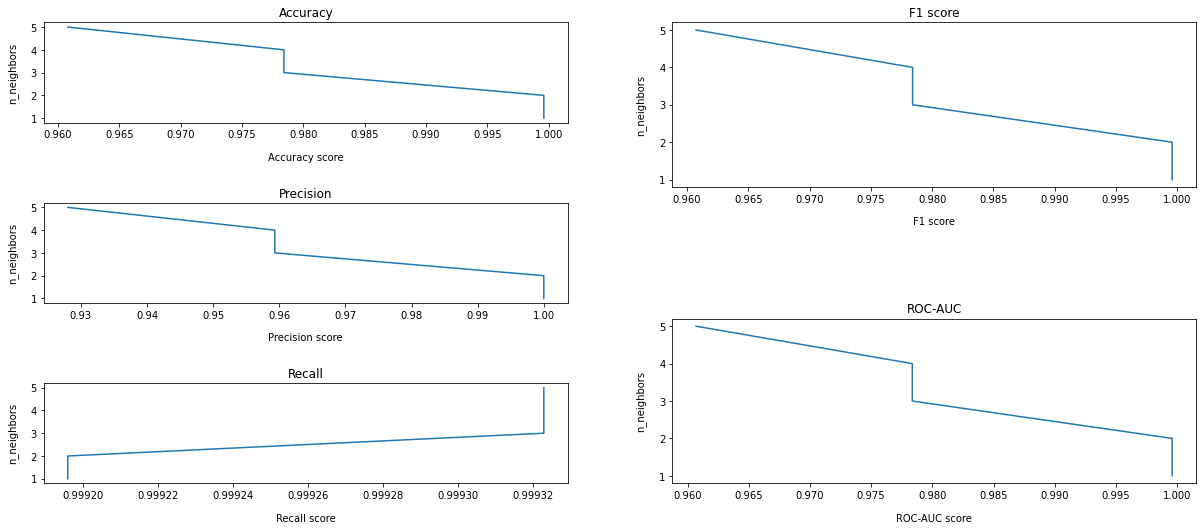

In [24]:
print("Let's see how the metrics for estimating the quality of the model differ for different numbers of nearest neighbors: \n")

s = [1, 2, 3, 4, 5]
c = "n_neighbors"

knn_acc_list = []
knn_pr_list = []
knn_recall_list = []
knn_f1_list = []
knn_roc_list = []
for i in range(5):
    knn_check = KNeighborsClassifier(n_neighbors=s[i], p=1).fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values).predict(tr_X_test)
    knn_acc_list.append(accuracy_score(tr_y_test, knn_check))
    knn_pr_list.append(precision_score(tr_y_test, knn_check))
    knn_recall_list.append(recall_score(tr_y_test, knn_check))
    knn_f1_list.append(f1_score(tr_y_test, knn_check, average='macro'))
    knn_roc_list.append(roc_auc_score(tr_y_test, knn_check))
    print("n_neighbors =", s[i], ":")
    print("accuracy:", accuracy_score(tr_y_test, knn_check))
    print("precision:", precision_score(tr_y_test, knn_check))
    print("recall:", recall_score(tr_y_test, knn_check))
    print("f1_score:", f1_score(tr_y_test, knn_check, average='macro'))
    print("roc_auc:", roc_auc_score(tr_y_test, knn_check), '\n')
    
print("Visualizing the result:")

visualization(knn_acc_list, knn_pr_list, knn_recall_list, knn_f1_list, knn_roc_list, s, c)

In [25]:
# Choosing the best ROC-AUC metric and add the values of the other metrics to the dataframe:

max_roc = max(knn_roc_list)
max_ind = knn_roc_list.index(max_roc)
metrics.loc["kNN", "Accuracy"] = knn_acc_list[max_ind]
metrics.loc["kNN", "Precision"] = knn_pr_list[max_ind]
metrics.loc["kNN", "Recall"] = knn_recall_list[max_ind]
metrics.loc["kNN", "F1"] = knn_f1_list[max_ind]
metrics.loc["kNN", "ROC-AUC"] = max_roc
metrics

,Accuracy,Precision,Recall,F1,ROC-AUC
Log_reg,0.749003,0.828489,0.629703,0.745482,0.749323
kNN,0.999597,1.0,0.999196,0.999597,0.999598
Tree,NaN,NaN,NaN,NaN,NaN
RF,NaN,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN


In [26]:
# Predicting the results of the test sample using the best hyperparameters of our model, and
# record the predictions in the dataframe:

print("The best parameters for the n nearest neighbor model are as follows:")
knn_clf.best_params_

predicted_knn = knn_clf.predict(tr_X_test)
print("accuracy:", accuracy_score(tr_y_test, predicted_knn))
print("precision:", precision_score(tr_y_test, predicted_knn))
print("recall:", recall_score(tr_y_test, predicted_knn))
print("roc_auc:", roc_auc_score(tr_y_test, predicted_knn))

predictions_knn = knn_clf.predict(X_test.values)
predicted_knn = pd.DataFrame(y_test.iloc[:, 0])
predicted_knn["target"] = predictions_knn
predicted_knn.to_csv("knn_predicted.csv", index=False)
predicted_knn

The best parameters for the n nearest neighbor model are as follows:
accuracy: 0.9995968426413173
precision: 1.0
recall: 0.9991958352732044
roc_auc: 0.9995979176366022


,index,target
0,143522,0
1,116747,1
2,66075,0
3,133292,0
4,83134,0
...,...,...
38871,44475,0
38872,103189,0
38873,48732,0
38874,135410,0


# Decision Tree

In [27]:
# Setting the hyperparameters of our model to be used in GridSearch, and then train our model, using the best parameters:

parameters = {"criterion": ["gini", "entropy"], "max_depth": [1, 2, 3, 4], "min_samples_split": [2, 3], "max_features": ["auto"], "ccp_alpha": [0.0, 0.005, 0.01, 0.02]}
decision_tree = DecisionTreeClassifier()
decision_tree_clf = GridSearchCV(decision_tree, parameters, n_jobs=-1, verbose=3)
decision_tree_clf.fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.005, 0.01, 0.02],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4], 'max_features': ['auto'],
                         'min_samples_split': [2, 3]},
             verbose=3)

Let's see how the model quality metrics will differ for different values of maximum tree depth: 

max_depth = 1 :
accuracy: 0.677240706161942
precision: 0.7880613362541073
recall: 0.4872391755195327
f1_score: 0.6653238035605877
roc_auc: 0.6777500502932755 

max_depth = 2 :
accuracy: 0.7309455101001527
precision: 0.7351664876476907
recall: 0.724213823168409
f1_score: 0.7309393226873735
roc_auc: 0.7309635559823152 

max_depth = 3 :
accuracy: 0.7576387710066202
precision: 0.716454439045153
recall: 0.854911753502349
f1_score: 0.7552124553335594
roc_auc: 0.7573780077243245 

max_depth = 4 :
accuracy: 0.7539254795450687
precision: 0.8059822972835486
recall: 0.670588733228933
f1_score: 0.7522782776228509
roc_auc: 0.7541488834435377 

Visualizing the result:


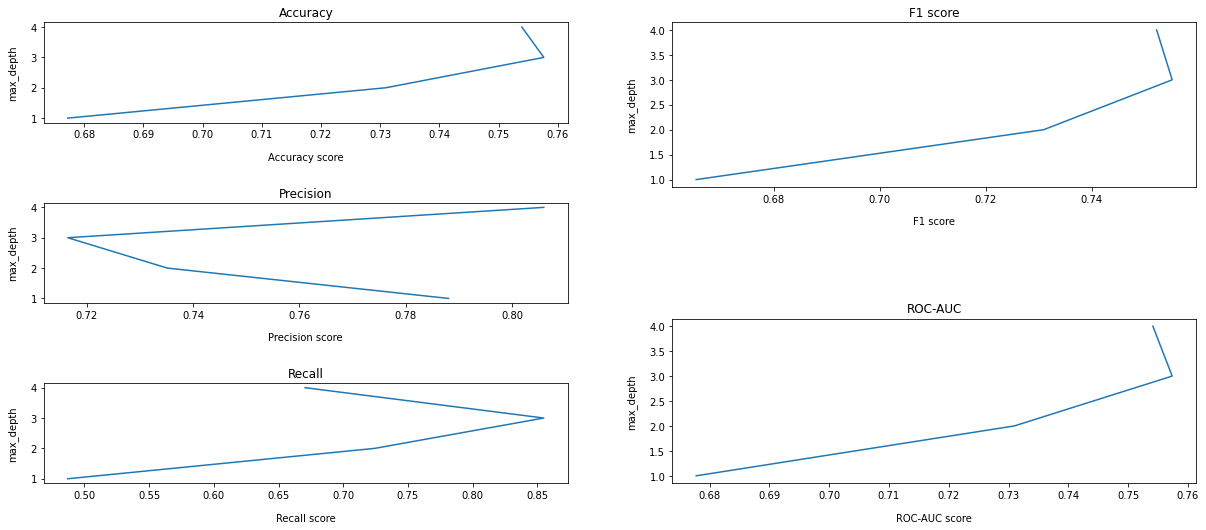

In [28]:
print("Let's see how the model quality metrics will differ for different values of maximum tree depth: \n")

s = [1, 2, 3, 4]
c = "max_depth"

tree_acc_list = []
tree_pr_list = []
tree_recall_list = []
tree_f1_list = []
tree_roc_list = []
for i in range(4):
    tree_check = DecisionTreeClassifier(ccp_alpha=0.0, criterion='entropy', max_depth=s[i], max_features='auto', min_samples_split=2).fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values).predict(tr_X_test)
    tree_acc_list.append(accuracy_score(tr_y_test, tree_check))
    tree_pr_list.append(precision_score(tr_y_test, tree_check))
    tree_recall_list.append(recall_score(tr_y_test, tree_check))
    tree_f1_list.append(f1_score(tr_y_test, tree_check, average='macro'))
    tree_roc_list.append(roc_auc_score(tr_y_test, tree_check))
    print("max_depth =", s[i], ":")
    print("accuracy:", accuracy_score(tr_y_test, tree_check))
    print("precision:", precision_score(tr_y_test, tree_check))
    print("recall:", recall_score(tr_y_test, tree_check))
    print("f1_score:", f1_score(tr_y_test, tree_check, average='macro'))
    print("roc_auc:", roc_auc_score(tr_y_test, tree_check), '\n')
    
print("Visualizing the result:")

visualization(tree_acc_list, tree_pr_list, tree_recall_list, tree_f1_list, tree_roc_list, s, c)

In [29]:
# Choosing the best ROC-AUC metric and add the values of the other metrics to the dataframe:

max_roc = max(tree_roc_list)
max_ind = tree_roc_list.index(max_roc)
metrics.loc["Tree", "Accuracy"] = tree_acc_list[max_ind]
metrics.loc["Tree", "Precision"] = tree_pr_list[max_ind]
metrics.loc["Tree", "Recall"] = tree_recall_list[max_ind]
metrics.loc["Tree", "F1"] = tree_f1_list[max_ind]
metrics.loc["Tree", "ROC-AUC"] = max_roc
metrics

,Accuracy,Precision,Recall,F1,ROC-AUC
Log_reg,0.749003,0.828489,0.629703,0.745482,0.749323
kNN,0.999597,1.0,0.999196,0.999597,0.999598
Tree,0.757639,0.716454,0.854912,0.755212,0.757378
RF,NaN,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN


In [41]:
# Predicting the results of the test sample using the best hyperparameters of our model,
# and record the predictions in the dataframe:


print("The best parameters for the decision tree model are as follows:")
decision_tree_clf.best_params_

predicted_decision_tree = decision_tree_clf.predict(tr_X_test)
print("accuracy:", accuracy_score(tr_y_test, predicted_decision_tree))
print("precision:", precision_score(tr_y_test, predicted_decision_tree))
print("recall:", recall_score(tr_y_test, predicted_decision_tree))
print("roc_auc:", roc_auc_score(tr_y_test, predicted_decision_tree))

predictions_decision_tree = decision_tree_clf.predict(X_test.values)
predicted_decision_tree = pd.DataFrame(y_test.iloc[:, 0])
predicted_decision_tree["target"] = predictions_decision_tree
predicted_decision_tree.to_csv("decision_tree_predicted.csv", index=False)
predicted_decision_tree

The best parameters for the decision tree model are as follows:
accuracy: 0.6998599558648786
precision: 0.8107222440686853
recall: 0.5235535616032505
roc_auc: 0.7003325869375343


,index,target
0,143522,0
1,116747,0
2,66075,1
3,133292,0
4,83134,0
...,...,...
38871,44475,0
38872,103189,0
38873,48732,0
38874,135410,0


# Random Forest

In [31]:
# Setting the hyperparameters of our model to be used in GridSearch, and then train our model, using the best parameters:

parameters = {"n_estimators": [1, 2, 3, 4, 5, 6], "criterion": ["gini", "entropy"], "min_samples_split": [2, 3], "max_features": ["sqrt", "log2"], "warm_start": [True]}
random_forest = RandomForestClassifier()
random_forest_clf = GridSearchCV(random_forest, parameters, n_jobs=-1, verbose=3)
random_forest_clf.fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [1, 2, 3, 4, 5, 6],
                         'warm_start': [True]},
             verbose=3)

Let's see how the metrics for estimating the quality of the model differ for different numbers of trees in the ensemble: 

n_estimators = 1 :
accuracy: 0.987056526905449
precision: 0.9751847722862216
recall: 0.9996190798662548
f1_score: 0.9870535219190586
roc_auc: 0.9870228500050392 

n_estimators = 2 :
accuracy: 0.9981115260566966
precision: 0.9966241876951641
recall: 0.9996190798662548
f1_score: 0.9981114930582864
roc_auc: 0.9981074847014351 

n_estimators = 3 :
accuracy: 0.9956077066711934
precision: 0.9916862613369164
recall: 0.9996190798662548
f1_score: 0.9956075104373877
roc_auc: 0.995596953234689 

n_estimators = 4 :
accuracy: 0.9988754031573587
precision: 0.9981404784041924
recall: 0.9996190798662548
f1_score: 0.9988753900324691
roc_auc: 0.9988734095556967 

n_estimators = 5 :
accuracy: 0.9980266508232898
precision: 0.9964559952746603
recall: 0.9996190798662548
f1_score: 0.9980266149272998
roc_auc: 0.9980223819398505 

n_estimators = 6 :
accuracy: 0.9989602783907656
precision: 

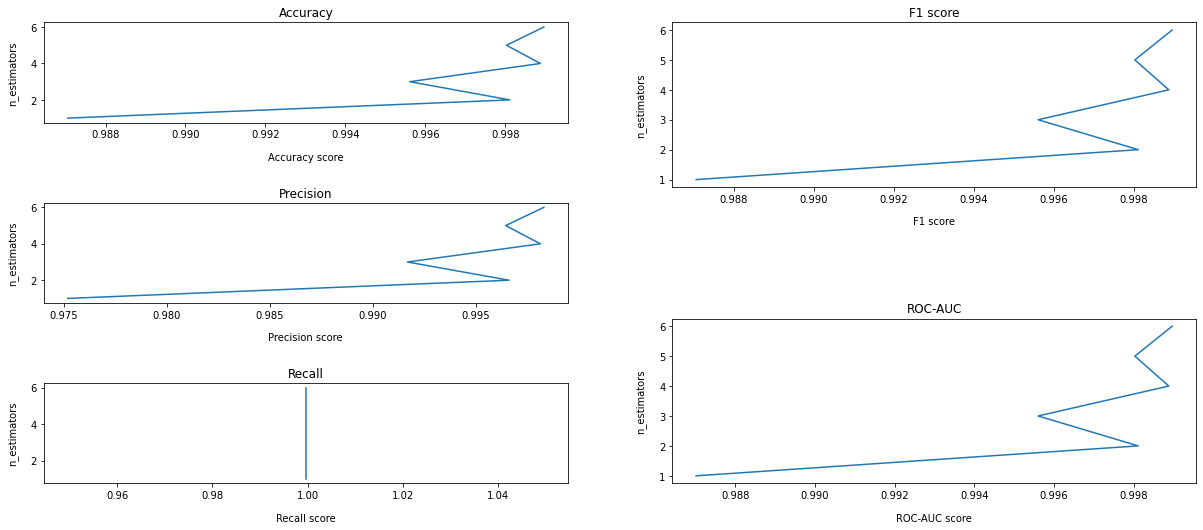

In [32]:
print("Let's see how the metrics for estimating the quality of the model differ for different numbers of trees in the ensemble: \n")

s = [1, 2, 3, 4, 5, 6]
c = "n_estimators"

random_forest_acc_list = []
random_forest_pr_list = []
random_forest_recall_list = []
random_forest_f1_list = []
random_forest_roc_list = []
for i in range(6):
    random_forest_check = RandomForestClassifier(criterion='gini', max_features='log2', min_samples_split=2, n_estimators=s[i], warm_start=True).fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values).predict(tr_X_test)
    random_forest_acc_list.append(accuracy_score(tr_y_test, random_forest_check))
    random_forest_pr_list.append(precision_score(tr_y_test, random_forest_check))
    random_forest_recall_list.append(recall_score(tr_y_test, random_forest_check))
    random_forest_f1_list.append(f1_score(tr_y_test, random_forest_check, average='macro'))
    random_forest_roc_list.append(roc_auc_score(tr_y_test, random_forest_check))
    print("n_estimators =", s[i], ":")
    print("accuracy:", random_forest_acc_list[i])
    print("precision:", random_forest_pr_list[i])
    print("recall:", random_forest_recall_list[i])
    print("f1_score:", random_forest_f1_list[i])
    print("roc_auc:", random_forest_roc_list[i], '\n')
    
print("Visualizing the result:")

visualization(random_forest_acc_list, random_forest_pr_list, random_forest_recall_list, random_forest_f1_list, random_forest_roc_list, s, c)

In [33]:
# Choosing the best ROC-AUC metric and add the values of the other metrics to the dataframe:

max_roc = max(random_forest_roc_list)
max_ind = random_forest_roc_list.index(max_roc)
metrics.loc["RF", "Accuracy"] = random_forest_acc_list[max_ind]
metrics.loc["RF", "Precision"] = random_forest_pr_list[max_ind]
metrics.loc["RF", "Recall"] = random_forest_recall_list[max_ind]
metrics.loc["RF", "F1"] = random_forest_f1_list[max_ind]
metrics.loc["RF", "ROC-AUC"] = max_roc
metrics

,Accuracy,Precision,Recall,F1,ROC-AUC
Log_reg,0.749003,0.828489,0.629703,0.745482,0.749323
kNN,0.999597,1.0,0.999196,0.999597,0.999598
Tree,0.757639,0.716454,0.854912,0.755212,0.757378
RF,0.99896,0.998309,0.999619,0.99896,0.998959
GB,NaN,NaN,NaN,NaN,NaN


In [34]:
# Predicting the results of the test sample using the best hyperparameters of our model, and record the predictions in the dataframe:

print("The best parameters for a random forest model are as follows:")
random_forest_clf.best_params_

predicted_random_forest = random_forest_clf.predict(tr_X_test)
print("accuracy:", accuracy_score(tr_y_test, predicted_random_forest))
print("precision:", precision_score(tr_y_test, predicted_random_forest))
print("recall:", recall_score(tr_y_test, predicted_random_forest))
print("roc_auc:", roc_auc_score(tr_y_test, predicted_random_forest))

predictions_random_forest = random_forest_clf.predict(X_test.values)
predicted_random_forest = pd.DataFrame(y_test.iloc[:, 0])
predicted_random_forest["target"] = predictions_random_forest
predicted_random_forest.to_csv("random_forest_predicted.csv", index=False)
predicted_random_forest

The best parameters for a random forest model are as follows:
accuracy: 0.9984298081819725
precision: 0.9972554152767809
recall: 0.9996190798662548
roc_auc: 0.9984266200573774


,index,target
0,143522,0
1,116747,0
2,66075,0
3,133292,0
4,83134,0
...,...,...
38871,44475,0
38872,103189,0
38873,48732,0
38874,135410,0


# XGBoost

In [35]:
# Let's set the hyperparameters of our model to be used in GridSearch, and then train our model, using the best parameters:

parameters = {"max_features": [3, 5, 7, 10], 'learning_rate': [0.1, 0.3, 0.5], "min_samples_split": [2, 3, 4], 'loss': ["deviance"], "n_estimators": [100, 150], "criterion": ["squared_error"], "validation_fraction": [0.2], "n_iter_no_change": [4], "tol": [0.001, 0.01]}
boost = GradientBoostingClassifier()
boost_clf = GridSearchCV(boost, parameters, n_jobs=-1, verbose=3)
boost_clf.fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5], 'loss': ['deviance'],
                         'max_features': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150], 'n_iter_no_change': [4],
                         'tol': [0.001, 0.01], 'validation_fraction': [0.2]},
             verbose=3)

Let's see how the metrics for estimating the quality of the model differ for different numbers of trees in the ensemble: 

n_estimators = 50 :
accuracy: 0.7970633169241216
precision: 0.8039334341906202
recall: 0.7871926186142972
f1_score: 0.7970510766567904
roc_auc: 0.7970897776701971 

n_estimators = 100 :
accuracy: 0.8108767611610932
precision: 0.8116580530373634
recall: 0.8109366402844204
f1_score: 0.8108758223728735
roc_auc: 0.8108766006409125 

n_estimators = 150 :
accuracy: 0.8093277881514174
precision: 0.8086604545262892
recall: 0.8117408050112159
f1_score: 0.8093237827503391
roc_auc: 0.8093213194878641 

n_estimators = 200 :
accuracy: 0.811428450178238
precision: 0.8129245923913043
recall: 0.81034409785415
f1_score: 0.8114282293477604
roc_auc: 0.8114313570416232 

Visualizing the result:


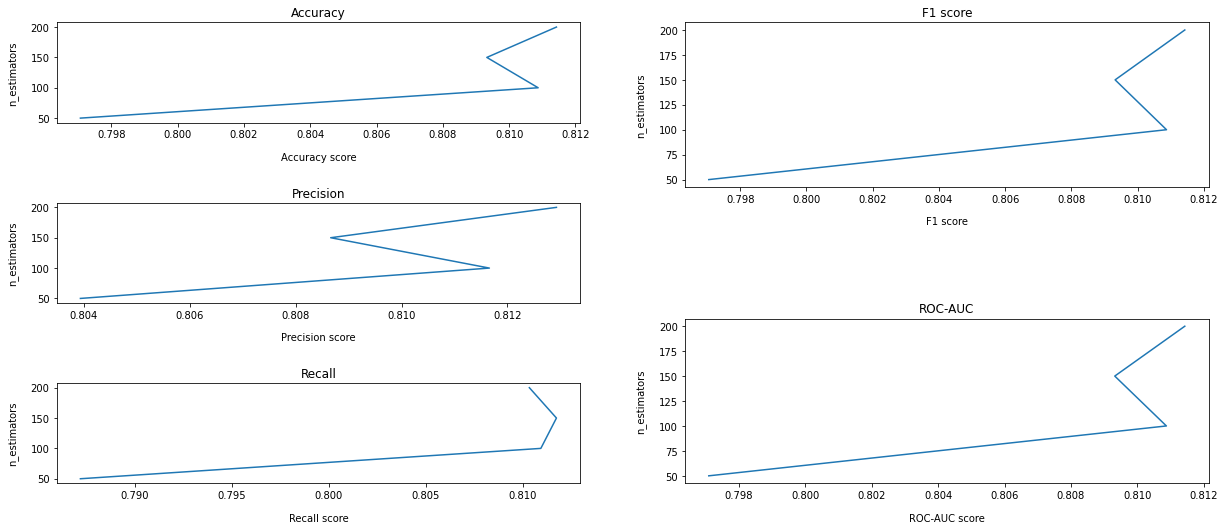

In [36]:
print("Let's see how the metrics for estimating the quality of the model differ for different numbers of trees in the ensemble: \n")

s = [50, 100, 150, 200]
c = "n_estimators"

boost_acc_list = []
boost_pr_list = []
boost_recall_list = []
boost_f1_list = []
boost_roc_list = []
for i in range(4):
    boost_check = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5, loss='deviance', max_features=10, min_samples_split=4, n_estimators=s[i], n_iter_no_change=4, tol=0.001, validation_fraction=0.2).fit(X_train.iloc[:, :-1].values, X_train.iloc[:, -1].values).predict(tr_X_test)
    boost_acc_list.append(accuracy_score(tr_y_test, boost_check))
    boost_pr_list.append(precision_score(tr_y_test, boost_check))
    boost_recall_list.append(recall_score(tr_y_test, boost_check))
    boost_f1_list.append(f1_score(tr_y_test, boost_check, average='macro'))
    boost_roc_list.append(roc_auc_score(tr_y_test, boost_check))
    print("n_estimators =", s[i], ":")
    print("accuracy:", boost_acc_list[i])
    print("precision:", boost_pr_list[i])
    print("recall:", boost_recall_list[i])
    print("f1_score:", boost_f1_list[i])
    print("roc_auc:", boost_roc_list[i], '\n')
    
print("Visualizing the result:")

visualization(boost_acc_list, boost_pr_list, boost_recall_list, boost_f1_list, boost_roc_list, s, c)

In [37]:
# Let's choosing the best ROC-AUC metric and add the values of the other metrics to the dataframe:

max_roc = max(boost_roc_list)
max_ind = boost_roc_list.index(max_roc)
metrics.loc["GB", "Accuracy"] = boost_acc_list[max_ind]
metrics.loc["GB", "Precision"] = boost_pr_list[max_ind]
metrics.loc["GB", "Recall"] = boost_recall_list[max_ind]
metrics.loc["GB", "F1"] = boost_f1_list[max_ind]
metrics.loc["GB", "ROC-AUC"] = max_roc
metrics

,Accuracy,Precision,Recall,F1,ROC-AUC
Log_reg,0.749003,0.828489,0.629703,0.745482,0.749323
kNN,0.999597,1.0,0.999196,0.999597,0.999598
Tree,0.757639,0.716454,0.854912,0.755212,0.757378
RF,0.99896,0.998309,0.999619,0.99896,0.998959
GB,0.811428,0.812925,0.810344,0.811428,0.811431


We see that the model quality metrics are higher for n_estimators = 150. Also at this value the result of predictions on the test sample is the highest, so let's take n_estimators = 150 as the best option out of the ones we have tested.

In [40]:
# Predicting the results of the test sample using the best hyperparameters of our model,
# and record the predictions in the dataframe:

print("The best parameters for the gradient boosting model are as follows:")
boost_clf.best_params_

predicted_boost = boost_clf.predict(tr_X_test)
print("accuracy:", accuracy_score(tr_y_test, predicted_boost))
print("precision:", precision_score(tr_y_test, predicted_boost))
print("recall:", recall_score(tr_y_test, predicted_boost))
print("roc_auc:", roc_auc_score(tr_y_test, predicted_boost))

predictions_boost = boost_clf.predict(X_test.values)
predicted_boost = pd.DataFrame(y_test.iloc[:, 0])
predicted_boost["target"] = predictions_boost
predicted_boost.to_csv("boost_predicted.csv", index=False)
predicted_boost

The best parameters for the gradient boosting model are as follows:
accuracy: 0.811810388728569
precision: 0.8130143378298125
recall: 0.8111905870402506
roc_auc: 0.8118120502538813


,index,target
0,143522,0
1,116747,0
2,66075,1
3,133292,0
4,83134,0
...,...,...
38871,44475,1
38872,103189,0
38873,48732,0
38874,135410,0


# The best quality metrics for different models

Below we display the table with the best indicators of quality of models and visualize it. In this case we will choose models with those hyperparameters, which allowed us to get the maximum value of ROC-AUC, as the ROC-curve is a good indicator of the ability of the model to produce a binary classification.

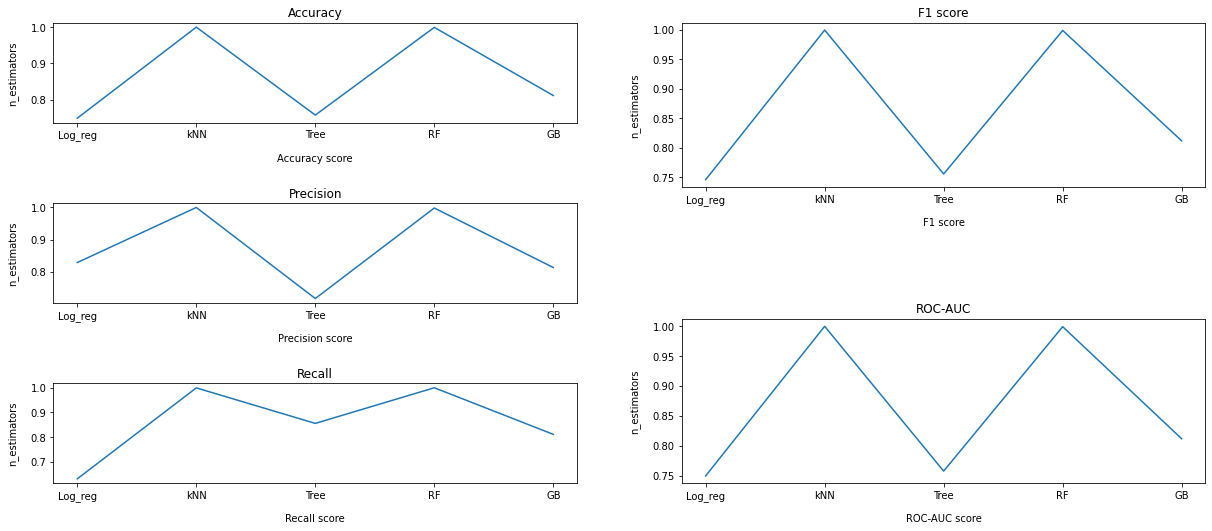

In [39]:
metrics

fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(321)
ax1.plot(metrics.iloc[:, 0])
ax1.set_title("Accuracy")
ax1.set_xlabel("Accuracy score", labelpad=12.5)
ax1.set_ylabel("{}".format(c), labelpad=12.5)
    
ax2 = fig.add_subplot(323)
ax2.plot(metrics.iloc[:, 1])
ax2.set_title("Precision")
ax2.set_xlabel("Precision score", labelpad=12.5)
ax2.set_ylabel("{}".format(c), labelpad=12.5)
    
ax3 = fig.add_subplot(325)
ax3.plot(metrics.iloc[:, 2])
ax3.set_title("Recall")
ax3.set_xlabel("Recall score", labelpad=12.5)
ax3.set_ylabel("{}".format(c), labelpad=12.5)
    
ax4 = fig.add_subplot(222)
ax4.plot(metrics.iloc[:, 3])
ax4.set_title("F1 score")
ax4.set_xlabel("F1 score", labelpad=12.5)
ax4.set_ylabel("{}".format(c), labelpad=12.5)

ax5 = fig.add_subplot(224)
ax5.plot(metrics.iloc[:, 4])
ax5.set_title("ROC-AUC")
ax5.set_xlabel("ROC-AUC score", labelpad=12.5)
ax5.set_ylabel("{}".format(c), labelpad=12.5)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.8)
plt.show()

# The best result

The best prediction result (0.77796) was shown by the gradient binning model with the following parameters:

{'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'deviance', 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 150, 'n_iter_no_change': 4, 'tol': 0.001, 'validation_fraction': 0.2}

The other models did not perform as well. Although some of them had excellent quality metrics, they failed to perform better in the test sample, which suggests that they were overtrained in the training sample.